In [1]:
import data_loader

# Use senator data
arr, reps, bills = data_loader.senate_records()

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 12
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of Senate Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show();

<Figure size 640x480 with 1 Axes>

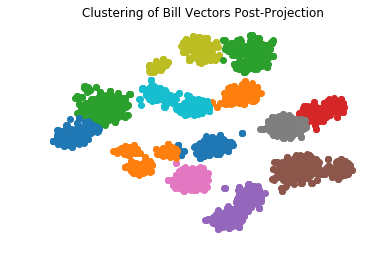

In [3]:
# Do the same after projection (not really that useful)
plt.axis('off')
num_clust = 13
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.title('Clustering of Senate Bill Vectors Post-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

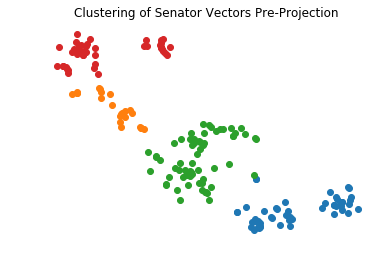

In [4]:
# And for the senators

em = TSNE(n_components=2).fit_transform(arr)
num_clust = 4
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Senator Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

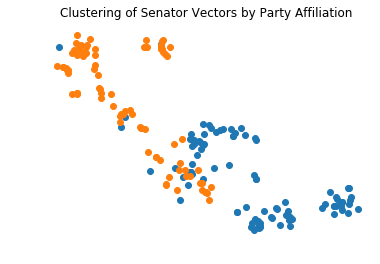

In [5]:
import numpy as np

# Senators by party with same projection

num_clust = 4
centers = np.array([1 if '(D' in x else 0 for x in reps])
plt.axis('off')
plt.title('Clustering of Senator Vectors by Party Affiliation')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

In [6]:
# Now use house data
arr, reps, bills = data_loader.house_records()

print(arr)

Unable to read 2017_711.xml
[[ 1.  1.  1. ... -1. -1.  1.]
 [-1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1.  1.]
 ...
 [ 1.  1.  1. ... -1. -1.  1.]
 [ 1.  1.  1. ... -1. -1.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


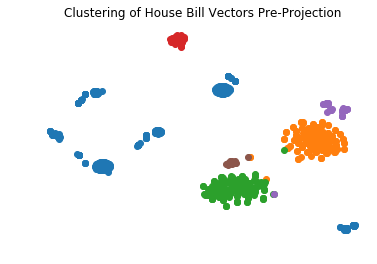

In [14]:
em = TSNE(n_components=2).fit_transform(arr.T)

# We color code the bill vectors by their cluster in the 
# original data before TSNE projection

num_clust = 6
centers = KMeans(n_clusters=num_clust).fit_predict(arr.T)
plt.axis('off')
plt.title('Clustering of House Bill Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show();

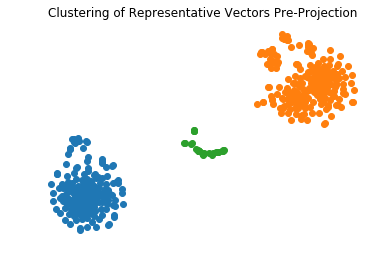

In [10]:
# House representative vector clustering
em = TSNE(n_components=2).fit_transform(arr)
num_clust = 3
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Representative Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()

In [ ]:
# House representative vectors
em = TSNE(n_components=2).fit_transform(arr)
num_clust = 3
centers = KMeans(n_clusters=num_clust).fit_predict(em)
plt.axis('off')
plt.title('Clustering of Representative Vectors Pre-Projection')
for i in range(num_clust):
    plt.scatter(em[centers == i, 0], em[centers == i, 1])
plt.show()